# EDA & Modelling

## Package loading

In [1]:
from EZS_func import *
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
import keras
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import to_graphviz
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from keras.callbacks import EarlyStopping
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process.kernels import ConstantKernel
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import DotProduct
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import LayerNormalization
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from pandas.api.types import is_numeric_dtype
from itertools import product
from scipy import stats
from sklearn import set_config
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from keras.utils import np_utils
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from yellowbrick.classifier import classification_report
from yellowbrick.classifier import class_prediction_error
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import precision_recall_curve
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier.threshold import discrimination_threshold
from yellowbrick.features import pca_decomposition
from yellowbrick.features import rank1d
from yellowbrick.features import rank2d
from yellowbrick.target import balanced_binning_reference
from yellowbrick.target import class_balance
from keras.utils.vis_utils import plot_model
from yellowbrick.model_selection import learning_curve
from yellowbrick.model_selection import feature_importances
from yellowbrick.contrib.missing import MissingValuesBar
from yellowbrick.contrib.missing import MissingValuesDispersion
from yellowbrick.target.feature_correlation import feature_correlation


## Exploratory Data Analysis 

### File and parameters loading

In [2]:
problem_type = 'classification'

In [3]:
stacking = 'True'

In [4]:
data_size = 'large'

In [5]:
df = pd.read_csv('/home/philippe/Documents/python project/EZStacking-v0.11/dataset/Dry_Bean_Dataset.csv')

In [6]:
target_col = 'Class'

In [7]:
user_drop_cols = []

In [8]:
threshold_NaN = 0.5

In [9]:
threshold_cat = 5

In [10]:
threshold_Z = 3.0

#### Dataset copy

In [11]:
df_copy = df.copy()

### Dataset Information

In [12]:
df.shape

(13611, 17)

#### Some records

In [13]:
display(df)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


#### Dataframe structure

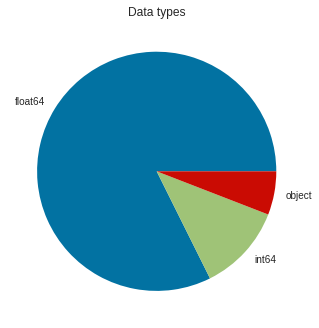

In [14]:
plot_dataframe_structure(df)

#### Dataframe statistics

In [15]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,738.860153
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.994677


#### Which columns could be categorical ?

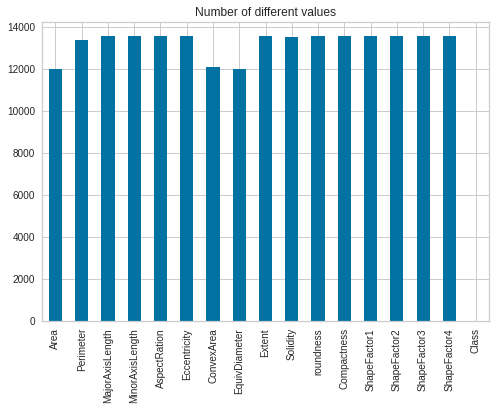

In [16]:
plot_categorical(df)

### Dataset Cleaning

#### Duplicate rows:

In [17]:
duplicates(df)

Number of rows before removing: 13611
Number of duplicate rows: 68
Number of rows after removing: 13543


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


#### Drop user's columns:

In [18]:
print('user_drop_cols = ', user_drop_cols)

user_drop_cols =  []


In [19]:
df = df.drop(user_drop_cols, axis=1)

#### Drop NaN:

In [20]:
df, drop_cols = drop_na(df, threshold_NaN)

No need to drop columns.


Final set of dropped columns

In [21]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [22]:
display(dropped_cols)

array([], dtype=float64)

#### Encoding data:

In [23]:
df, encoded_cols = encoding(df, threshold_cat)

Encoding numeric column: Area
Encoding numeric column: Perimeter
Encoding numeric column: MajorAxisLength
Encoding numeric column: MinorAxisLength
Encoding numeric column: AspectRation
Encoding numeric column: Eccentricity
Encoding numeric column: ConvexArea
Encoding numeric column: EquivDiameter
Encoding numeric column: Extent
Encoding numeric column: Solidity
Encoding numeric column: roundness
Encoding numeric column: Compactness
Encoding numeric column: ShapeFactor1
Encoding numeric column: ShapeFactor2
Encoding numeric column: ShapeFactor3
Encoding numeric column: ShapeFactor4
Encoding object column: Class


#### Imputing NaN using IterativeImputer

No handles with labels found to put in legend.


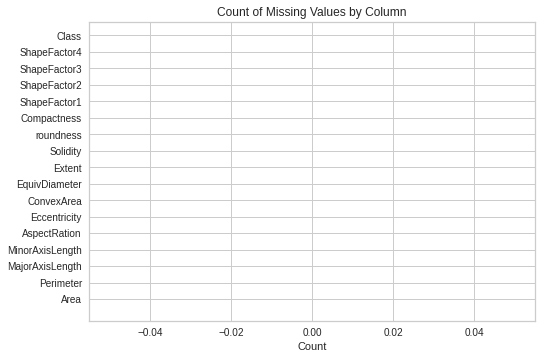

In [24]:
visualizer = MissingValuesBar(features=df.select_dtypes(include=np.number).columns.tolist())
visualizer.fit(df.select_dtypes(include=np.number))
visualizer.show();

##### Imputation

In [25]:
df = imputation(df)

No need to impute data.


#### Data compression:

In [26]:
df = downcast_dtypes(df)

Memory usage of dataframe is 1.77MB
Memory usage after optimization is: 0.43MB
Decreased by 75.7%


##### Dataframe structure after compression

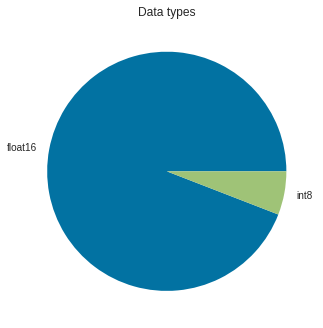

In [27]:
plot_dataframe_structure(df)

#### Outliers:

In [28]:
df = outliers(df, threshold_Z)

Using Z_score,  1124  rows will be suppressed.


#### Splitting dataframe in features and targets

In [29]:
y = df[target_col]

In [30]:
X = df.drop(target_col, axis=1)

### Plottings

#### Ranking 

##### Ranking 1D 

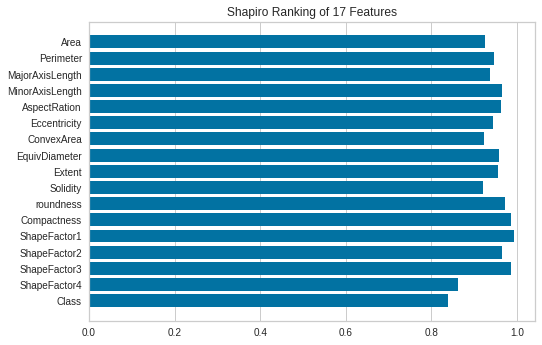

In [31]:
rank1d(df);

##### Ranking 2D 

###### Ranking 2D according to Pearson

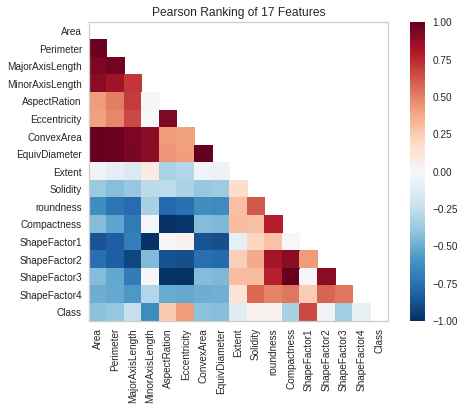

In [32]:
rank2d(df, algorithm='pearson');

###### Ranking 2D based on covariance

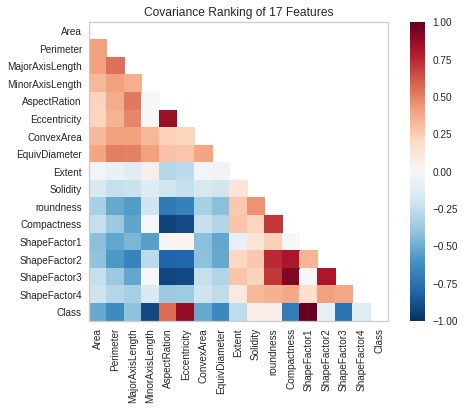

In [33]:
rank2d(df, algorithm='covariance');

###### Ranking 2D according to Spearman

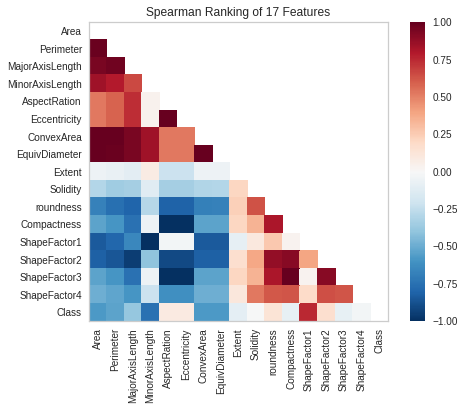

In [34]:
rank2d(df, algorithm='spearman');

###### Ranking 2D according to Kendalltau

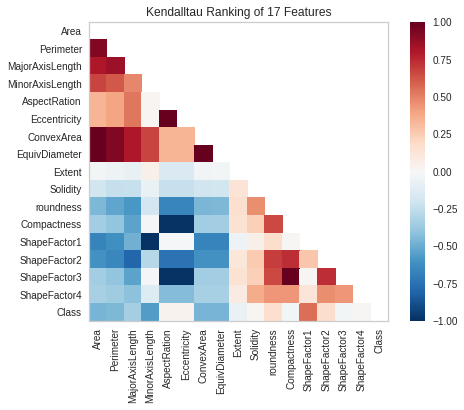

In [35]:
rank2d(df, algorithm='kendalltau');

#### Correlation

##### Correlation with Yellow Bricks

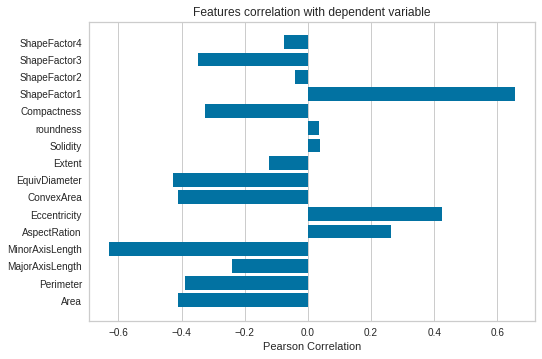

In [36]:
feature_correlation(X, y);

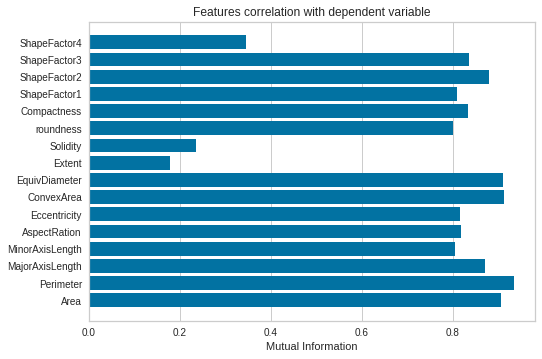

In [37]:
feature_correlation(X, y, method='mutual_info-classification');

#### Feature importance (a priori)

##### According to decision tree

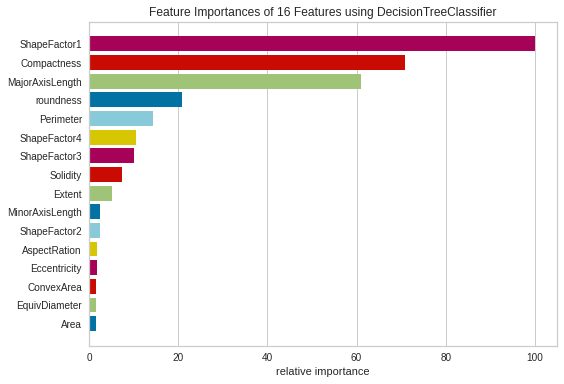

In [38]:
feature_importances(DecisionTreeClassifier(), X, y);

##### According to logistic regression

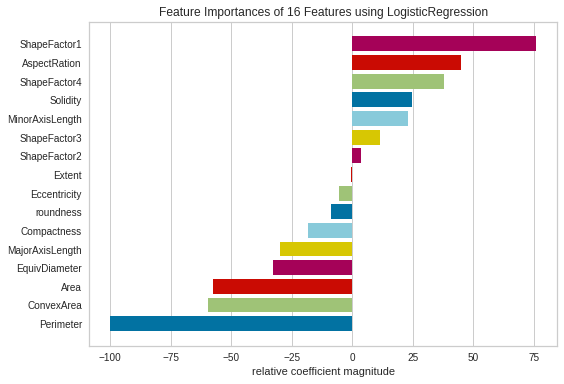

In [39]:
feature_importances(LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5), X, y);

#### PCA

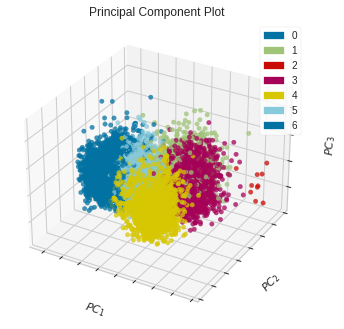

In [40]:
pca_decomposition(X, y.astype(int), projection=3);

#### Class balancing

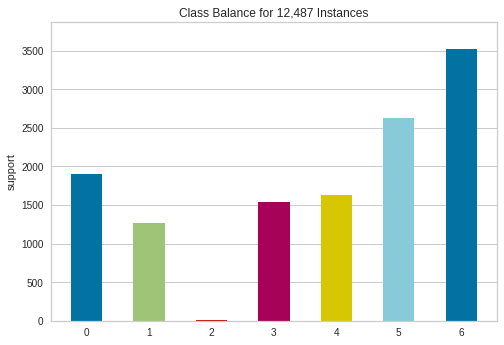

Entropy =  0.8904046599209392


In [41]:
class_balance(y)
print('Entropy = ', shannon_entropy(y))

## Splittings 

In [42]:
df = df_copy

#### Splitting dataframe in features and targets

In [43]:
y = df[target_col]

In [44]:
X = df.drop(target_col, axis=1)

##### Dimensions

In [45]:
d_F=len(X.columns.tolist())

In [46]:
d_T=len(y.unique())

##### Encoding data

In [47]:
target_encoder = LabelEncoder()
y = pd.Series(target_encoder.fit_transform(y))

##### Splitting data in train and test sets 

In [48]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.33, stratify=None)

## Modelling

### Model building

#### Pipeline building

##### Select the categorical and numerical columns

In [49]:
cat_selector = make_column_selector(dtype_include=object)

In [50]:
num_selector = make_column_selector(dtype_include=np.number)

##### For models based on tree

In [51]:
cat_tree_processor = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [52]:
num_tree_processor = SimpleImputer(strategy='mean', add_indicator=True)

In [53]:
tree_preprocessor = make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector))

##### For models not based on tree

In [54]:
cat_ntree_processor = OneHotEncoder(handle_unknown='ignore')

In [55]:
num_ntree_processor = make_pipeline(StandardScaler(), SimpleImputer(strategy='mean', add_indicator=True))

In [56]:
ntree_preprocessor = make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector))

##### Keras neural network definition

In [57]:
def K_Class(): 
    keras.backend.clear_session() 
#   neural network architecture: start 
    model = Sequential() 
    model.add(Dense(d_F + d_T + 2, input_dim=d_F, activation='relu')) 
    model.add(BatchNormalization()) 
#    model.add(LayerNormalization()) 
    model.add(Dense(d_T, activation='softmax')) 
#   neural network architecture: end   
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
#   Keras training parameters: epoch and batch_size 
K_C = KerasClassifier(build_fn=K_Class, epochs=1000, batch_size=64, verbose=0) 
K_C._estimator_type = 'classifier' 

##### Level-0 models

In [58]:
level_0 = [ 
          ('RFC', make_pipeline(tree_preprocessor, RandomForestClassifier(max_depth=5, n_estimators=10, max_features='auto'))), 
          ('ABC', make_pipeline(tree_preprocessor, AdaBoostClassifier())), 
          ('SGDC', make_pipeline(ntree_preprocessor, SGDClassifier(loss='log'))), 
          ('SVCL', make_pipeline(ntree_preprocessor, SVC(kernel='linear'))), 
          ('SVCP', make_pipeline(ntree_preprocessor, SVC(kernel='poly'))), 
          ('SVCG', make_pipeline(ntree_preprocessor, SVC(kernel='rbf'))), 
          ('XGBC', make_pipeline(tree_preprocessor, XGBClassifier(max_depth=5, n_estimators=10, verbosity=0))), 
          ('KERC', make_pipeline(ntree_preprocessor, K_C)), 
          ]

##### Level-1 model

In [59]:
level_1 = MLPClassifier()

##### Stacking for classification

In [64]:
model = StackingClassifier(level_0, final_estimator=level_1)

### Model fitting

In [65]:
%%time
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 38min 25s, sys: 11min 21s, total: 49min 47s
Wall time: 22min 31s


StackingClassifier(estimators=[('RFC',
                                Pipeline(steps=[('columntransformer',
                                                 ColumnTransformer(transformers=[('simpleimputer',
                                                                                  SimpleImputer(add_indicator=True),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f82ec365700>),
                                                                                 ('ordinalencoder',
                                                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                 unknown_value=-1),
                                                                                  <sklearn.compose._column...
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f82ec365700>),
                                                                                 ('onehotencoder',
                                                                                  OneHotEncoder(handle_unknown='ignore'),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f82ec1ccdf0>)])),
                                                ('kerasclassifier',
                                                 <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f82ec391280>)]))],
                   final_estimator=MLPClassifier())

#### Keras neural network description

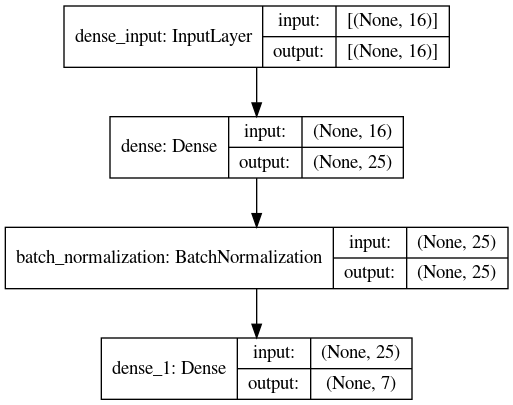

In [66]:
plot_model(K_Class(), show_shapes=True, show_layer_names=True)

### Model evaluation

#### Model scoring

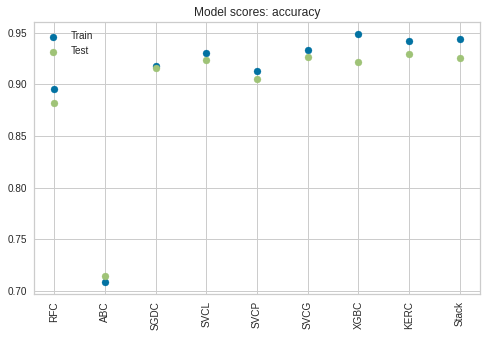

array([['RFC', 0.8951639434148482, 0.8815672306322351],
       ['ABC', 0.7089593157144424, 0.7141585040071238],
       ['SGDC', 0.9180831231494682, 0.9158504007123776],
       ['SVCL', 0.9303651716196951, 0.9234194122885129],
       ['SVCP', 0.9126000657966883, 0.9056099732858415],
       ['SVCG', 0.9333260225901963, 0.9265360641139804],
       ['XGBC', 0.9482399385897576, 0.9216384683882458],
       ['KERC', 0.9423182366487554, 0.9296527159394479],
       ['Stack', 0.9441824761487005, 0.9256455921638468]], dtype=object)

In [67]:
score_stacking_c(model, X_train, y_train, X_test, y_test)

#### ROC/AUC

In [68]:
classes = target_encoder.inverse_transform(y.unique())

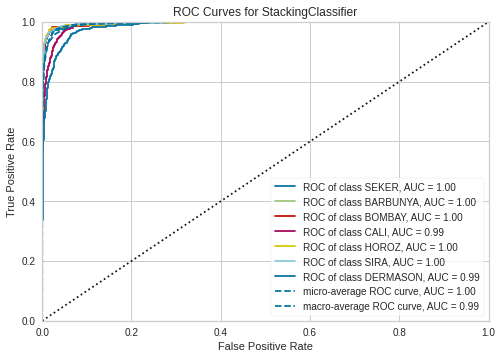

In [69]:
roc_auc(model, X_train, y_train, X_test = X_test, y_test = y_test, classes = classes);

#### Classification report

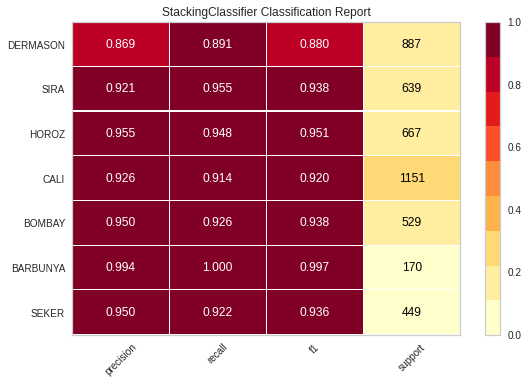

In [70]:
classification_report(model, X_train, y_train, X_test, y_test, classes=classes, support=True);

#### Confusion matrix

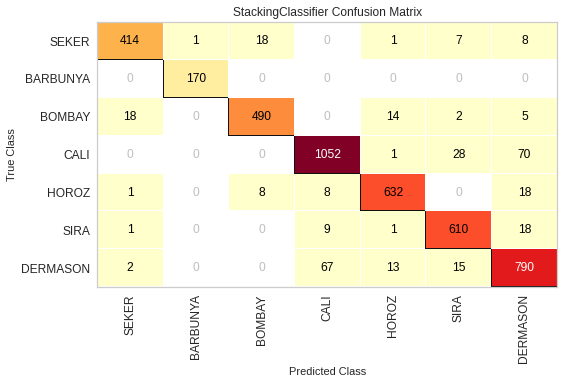

In [71]:
confusion_matrix(model, X_train, y_train, X_test, y_test, classes=classes);

#### Class prediction error

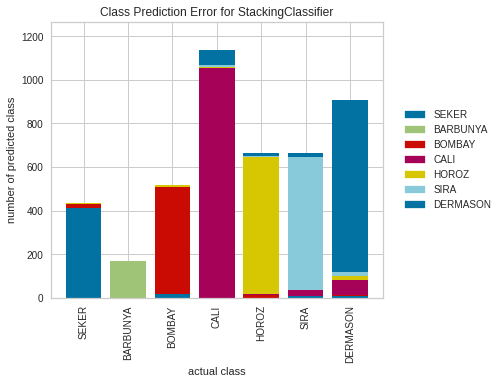

In [72]:
class_prediction_error(model, X_train, y_train, X_test, y_test, classes=classes);